# Python Assigment 3

Muhammad Farhan Atsar Ghiffari <br>
PYTN-KS12-011

sumber: https://archive.ics.uci.edu/ml/datasets/Bank+Marketing

In [92]:
#for data prepocessing
import pandas as pd
import numpy as np 

#for visualization
import matplotlib.pyplot as plt
import seaborn as sns

#for encoding categorical data
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import LabelEncoder

#for splitting data into train and test
from sklearn.model_selection import train_test_split

#for building model
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn import svm
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB

#for evaluating model
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [2]:
df = pd.read_csv('../Dataset/bank-additional-full.csv', sep=';')
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


## Data Understanding

In [3]:
# data understanding
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [4]:
df.shape

(41188, 21)

In [5]:
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y'],
      dtype='object')

In [6]:
df['age'].unique()

array([56, 57, 37, 40, 45, 59, 41, 24, 25, 29, 35, 54, 46, 50, 39, 30, 55,
       49, 34, 52, 58, 32, 38, 44, 42, 60, 53, 47, 51, 48, 33, 31, 43, 36,
       28, 27, 26, 22, 23, 20, 21, 61, 19, 18, 70, 66, 76, 67, 73, 88, 95,
       77, 68, 75, 63, 80, 62, 65, 72, 82, 64, 71, 69, 78, 85, 79, 83, 81,
       74, 17, 87, 91, 86, 98, 94, 84, 92, 89], dtype=int64)

In [7]:
df['job'].unique()

array(['housemaid', 'services', 'admin.', 'blue-collar', 'technician',
       'retired', 'management', 'unemployed', 'self-employed', 'unknown',
       'entrepreneur', 'student'], dtype=object)

In [8]:
df['marital'].unique()

array(['married', 'single', 'divorced', 'unknown'], dtype=object)

In [9]:
df['education'].unique()

array(['basic.4y', 'high.school', 'basic.6y', 'basic.9y',
       'professional.course', 'unknown', 'university.degree',
       'illiterate'], dtype=object)

In [10]:
df['default'].unique()

array(['no', 'unknown', 'yes'], dtype=object)

In [12]:
df['housing'].unique()

array(['no', 'yes', 'unknown'], dtype=object)

In [13]:
df['loan'].unique()

array(['no', 'yes', 'unknown'], dtype=object)

In [14]:
df['contact'].unique()

array(['telephone', 'cellular'], dtype=object)

## data Preparation

In [17]:
# karena terdapat data yang uknknown, maka kita akan menghapus data tersebut
df = df[df != 'unknown']

In [18]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,NaN,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [19]:
# mengecek apakah ada data yang kosong
df.isnull().sum()

age                  0
job                330
marital             80
education         1731
default           8597
housing            990
loan               990
contact              0
month                0
day_of_week          0
duration             0
campaign             0
pdays                0
previous             0
poutcome             0
emp.var.rate         0
cons.price.idx       0
cons.conf.idx        0
euribor3m            0
nr.employed          0
y                    0
dtype: int64

In [20]:
# menghapus data yang kosong
df = df.dropna()

In [21]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
6,59,admin.,married,professional.course,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [22]:
# mengecek apakah ada data yang duplikat
df.duplicated().sum()

10

In [23]:
# mengahpus data yang duplikat
df = df.drop_duplicates()

In [24]:
# mengecek kembali apakah masih ada data yang duplikat
df.duplicated().sum()

0

## Visualisasi Data

Text(0.5, 1.0, 'Histogram of Age')

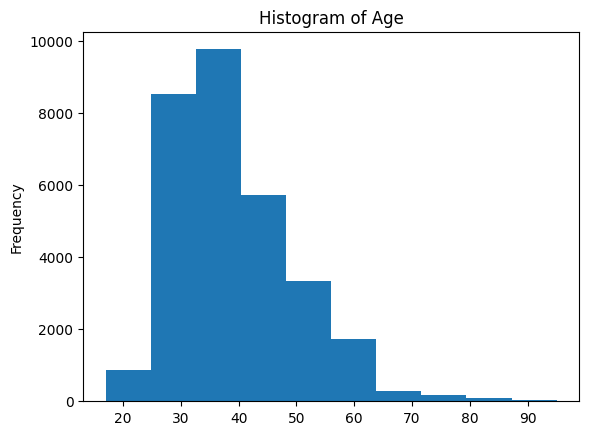

In [25]:
df['age'].plot(kind='hist')
plt.title('Histogram of Age')

<center>Berdasarkan data, dapat dilihat pada histogram dari age yang bentuknya menceng kiri, data berkumpul pada nilai yang kecil. Ini berarti bahwa frekuensi nasabah dengan usia rentang 30 - 40 lebih banyak.

Text(0.5, 1.0, 'Pekerjaan yang paling banyak')

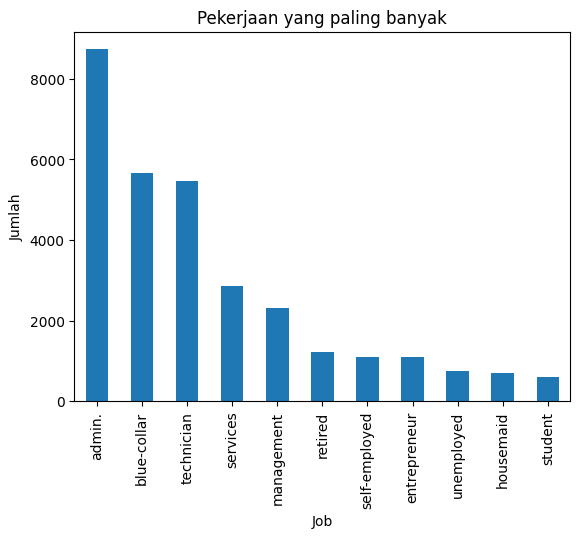

In [28]:
# pekerjaan yang paling banyak
df['job'].value_counts().plot(kind='bar')
plt.title('Bar Chart of Job')
plt.xlabel('Job')
plt.ylabel('Jumlah')
plt.title('Pekerjaan yang paling banyak')


<center>dapat dilihat, pekerjaan yang paling banyak adalah yang berprofesi adminstrasi, blue-collar, dan technician.

Text(0.5, 1.0, 'Status yang paling banyak')

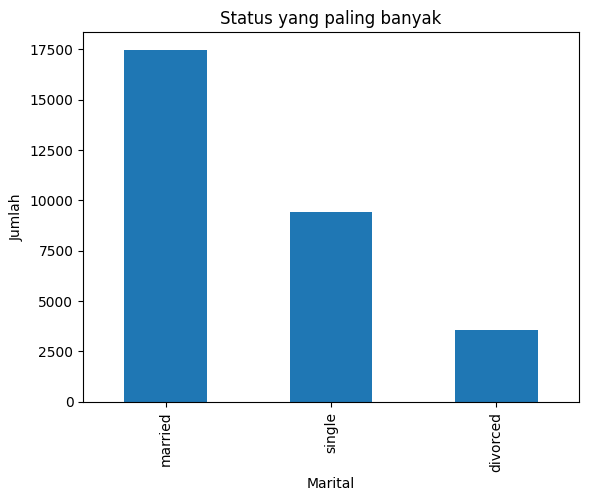

In [29]:
# status yang paling banyak
df['marital'].value_counts().plot(kind='bar')
plt.title('Bar Chart of Marital')
plt.xlabel('Marital')
plt.ylabel('Jumlah')
plt.title('Status yang paling banyak')

<center>Nasabah dengan status Married lebih banyak dibandingkan dengan single, serta nasabah dengan status divorced jumlahnya paling sedikit.

Text(0.5, 1.0, 'Persentage of Loan Status')

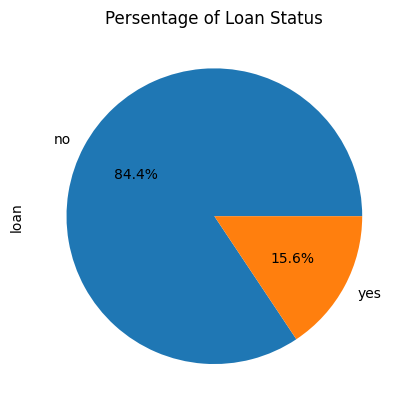

In [32]:
df['loan'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.title('Persentage of Loan Status')

<center>Sebanyak 84.4% nasabah tidak memiliki personal loan, dan sisanya 15.6% memiliki personal loan

## Data Preprocessing

In [33]:
#encoding data tipe kategori
data = ['job','marital','education','default','housing','loan','contact','month','day_of_week','poutcome','y']
label_encoder = LabelEncoder()
for col in data:
    df[col] = label_encoder.fit_transform(df[col])
df.head(5)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,3,1,0,0,0,0,1,6,1,...,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0
2,37,7,1,3,0,1,0,1,6,1,...,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0
3,40,0,1,1,0,0,0,1,6,1,...,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0
4,56,7,1,3,0,0,1,1,6,1,...,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0
6,59,0,1,5,0,0,0,1,6,1,...,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0


In [34]:
#split data for train and test data
y = df.iloc[:,-1]
X = df.iloc[:,0:20]

In [58]:
#20% data test dan 80% data train
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=1, test_size=0.2)

## Modelling

### 1. Logistic Regression

In [36]:
#bulding and fitting Logistic Regression Model
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

c:\Users\hp\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [37]:
print('Test data accuracy', logreg.score(X_test, y_test))

Test data accuracy 0.9019028871391076


In [38]:
#check for confusion matrix Logistic Regression Model
pred_test1 = logreg.predict(X_test)
print(accuracy_score(y_test, pred_test1))
matrix1 = confusion_matrix(y_test, pred_test1)
print(matrix1)

0.9019028871391076
[[5210  151]
 [ 447  288]]


<function matplotlib.pyplot.show(close=None, block=None)>

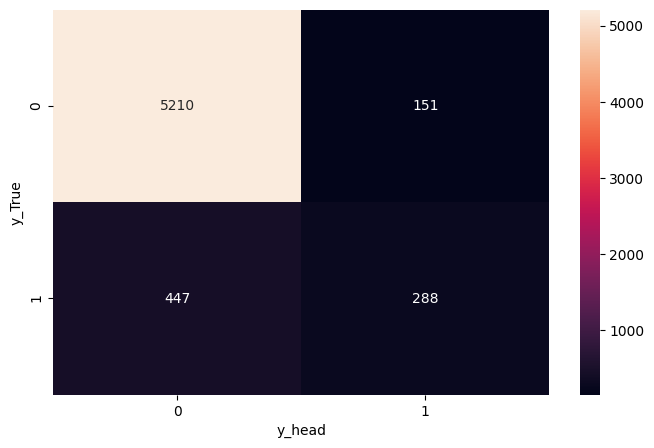

In [40]:
#visualize the confusion matrix Logistic Regression Model
f, ax = plt.subplots(figsize=(8,5))
sns.heatmap(matrix1, annot=True, fmt=".0f", ax=ax)
plt.xlabel('y_head')
plt.ylabel("y_True")
plt.show

In [48]:
#Metrics Performance for Logistic Regression Model
print(classification_report(y_test, pred_test1))

              precision    recall  f1-score   support

           0       0.92      0.97      0.95      5361
           1       0.66      0.39      0.49       735

    accuracy                           0.90      6096
   macro avg       0.79      0.68      0.72      6096
weighted avg       0.89      0.90      0.89      6096



### 2. Support Vector Machine

In [61]:
#building SVM model
svm_model = SVC()

In [62]:
#fitting SVM model
svm_model.fit(X_train, y_train)

SVC()

In [63]:
#check for accuracy SVM model with test data
print('Test data accuracy', svm_model.score(X_test, y_test))

Test data accuracy 0.890748031496063


In [64]:
#check for confusion matrix SVM Model
pred_test3 = svm_model.predict(X_test)
print(accuracy_score(y_test, pred_test3))
matrix3 = confusion_matrix(y_test, pred_test3)
print(matrix3)

0.890748031496063
[[5264   97]
 [ 569  166]]


<function matplotlib.pyplot.show(close=None, block=None)>

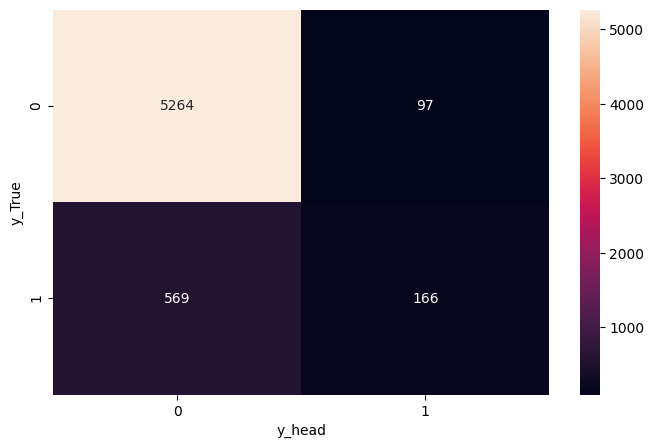

In [65]:
#visualize the confusion matrix SVM Model
f, ax = plt.subplots(figsize=(8,5))
sns.heatmap(matrix3, annot=True, fmt=".0f", ax=ax)
plt.xlabel('y_head')
plt.ylabel("y_True")
plt.show

In [66]:
#Metrics Performance for SVM Model
print(classification_report(y_test, pred_test3))

              precision    recall  f1-score   support

           0       0.90      0.98      0.94      5361
           1       0.63      0.23      0.33       735

    accuracy                           0.89      6096
   macro avg       0.77      0.60      0.64      6096
weighted avg       0.87      0.89      0.87      6096



### 3. Decision Tree

In [67]:
#building and fitting Decision Tree Model
decisiontree = DecisionTreeClassifier(criterion="entropy", max_depth=5)
decisiontree.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=5)

In [68]:
#check for accuracy Decision Tree model with test data
print('Test data accuracy', decisiontree.score(X_test, y_test))

Test data accuracy 0.9091207349081365


In [69]:
#check for confusion matrix Decision Tree Model
pred_test4 = decisiontree.predict(X_test)
print(accuracy_score(y_test, pred_test4))
matrix4 = confusion_matrix(y_test, pred_test4)
print(matrix4)

0.9091207349081365
[[5106  255]
 [ 299  436]]


<function matplotlib.pyplot.show(close=None, block=None)>

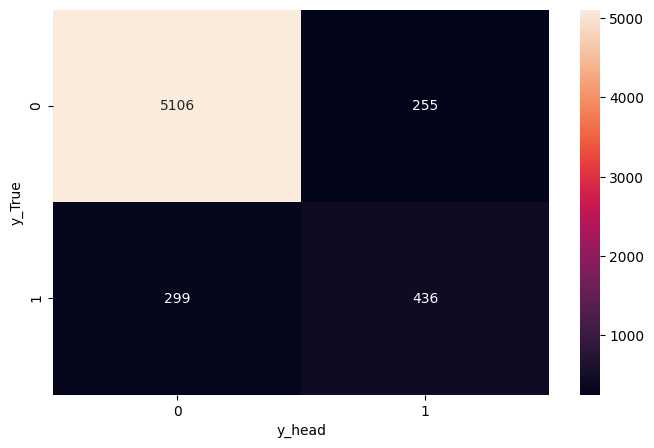

In [70]:
#visualize the confusion matrix Decision Tree Model
f, ax = plt.subplots(figsize=(8,5))
sns.heatmap(matrix4, annot=True, fmt=".0f", ax=ax)
plt.xlabel('y_head')
plt.ylabel("y_True")
plt.show

In [71]:
#Metrics Performance for Decision Tree Model
print(classification_report(y_test, pred_test4))

              precision    recall  f1-score   support

           0       0.94      0.95      0.95      5361
           1       0.63      0.59      0.61       735

    accuracy                           0.91      6096
   macro avg       0.79      0.77      0.78      6096
weighted avg       0.91      0.91      0.91      6096



### 4. Random Forest

In [72]:
#building and fitting Random Forest Model
randomforest = RandomForestClassifier(n_estimators=100)
randomforest.fit(X_train, y_train)

RandomForestClassifier()

In [73]:
#check for accuracy Random Forest model with test data
print('Test data accuracy', randomforest.score(X_test, y_test))

Test data accuracy 0.9096128608923885


In [74]:
#check for confusion matrix Random Forest Model
pred_test5 = randomforest.predict(X_test)
print(accuracy_score(y_test, pred_test5))
matrix5 = confusion_matrix(y_test, pred_test5)
print(matrix5)

0.9096128608923885
[[5152  209]
 [ 342  393]]


<function matplotlib.pyplot.show(close=None, block=None)>

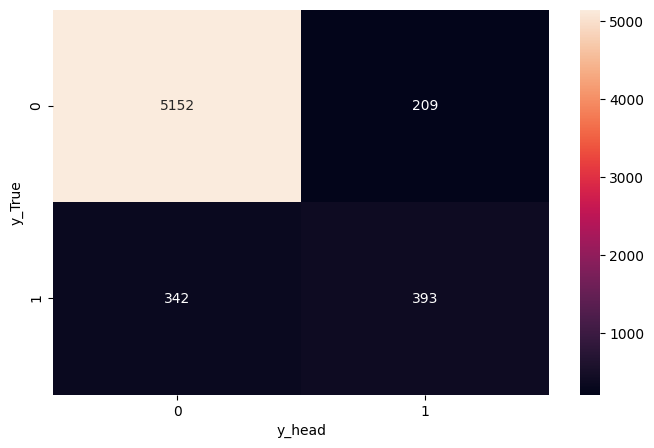

In [75]:
#visualize the confusion matrix Random Forest Model
f, ax = plt.subplots(figsize=(8,5))
sns.heatmap(matrix5, annot=True, fmt=".0f", ax=ax)
plt.xlabel('y_head')
plt.ylabel("y_True")
plt.show

In [76]:
#Metrics Performance for Random Forest Model
print(classification_report(y_test, pred_test5))

              precision    recall  f1-score   support

           0       0.94      0.96      0.95      5361
           1       0.65      0.53      0.59       735

    accuracy                           0.91      6096
   macro avg       0.80      0.75      0.77      6096
weighted avg       0.90      0.91      0.91      6096



### 5. Naive Bayes

In [77]:
#building and fitting Naive Bayes Model
naivebayes = GaussianNB()
naivebayes.fit(X_train, y_train)

GaussianNB()

In [78]:
#check for accuracy Naive Bayes model with test data
print('Test data accuracy', naivebayes.score(X_test, y_test))

Test data accuracy 0.8333333333333334


In [79]:
#check for confusion matrix Naive Bayes Model
pred_test6 = naivebayes.predict(X_test)
print(accuracy_score(y_test, pred_test6))
matrix6 = confusion_matrix(y_test, pred_test6)
print(matrix6)

0.8333333333333334
[[4631  730]
 [ 286  449]]


<function matplotlib.pyplot.show(close=None, block=None)>

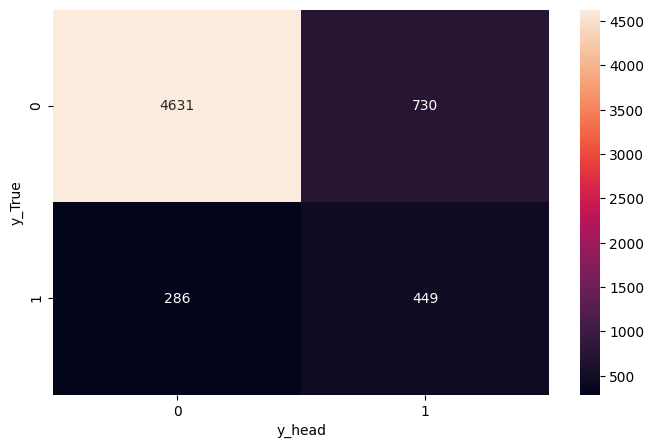

In [80]:
#visualize the confusion matrix Naive Bayes Model
f, ax = plt.subplots(figsize=(8,5))
sns.heatmap(matrix6, annot=True, fmt=".0f", ax=ax)
plt.xlabel('y_head')
plt.ylabel("y_True")
plt.show

In [81]:
#Metrics Performance for Random Forest Model
print(classification_report(y_test, pred_test6))

              precision    recall  f1-score   support

           0       0.94      0.86      0.90      5361
           1       0.38      0.61      0.47       735

    accuracy                           0.83      6096
   macro avg       0.66      0.74      0.69      6096
weighted avg       0.87      0.83      0.85      6096



## Kesimpulan Model

In [91]:
print("Akurasi masing-masing model:")
print("Logistic Regression:",accuracy_score(y_test, pred_test1))
print("Support Vector Machine:",accuracy_score(y_test, pred_test3))
print("Decision Tree:",accuracy_score(y_test, pred_test4))
print("Random Forest:",accuracy_score(y_test, pred_test5))
print("Naive Bayes:",accuracy_score(y_test, pred_test6))

Akurasi masing-masing model:
Logistic Regression: 0.9019028871391076
Support Vector Machine: 0.890748031496063
Decision Tree: 0.9091207349081365
Random Forest: 0.9096128608923885
Naive Bayes: 0.8333333333333334


Berdasarkan fitting model serta training model classifcation yang telah dilakukan, didapat hasil bahwa tingkat akurasi tertinggi ada pada model Decision Tree yaitu 90.91%.